In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
!pip install catboost
from catboost import CatBoostRegressor
!pip install xgboost
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv("stud.csv")
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X=df.drop(columns=['math_score'])
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
Y =df['math_score']
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
num_features = X.select_dtypes(exclude ='object').columns
cat_features = X.select_dtypes(include ='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer=StandardScaler()
OH_transformer=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",OH_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features),
    ]
)

In [10]:
X=preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [13]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    r2_square=r2_score(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    return mae,mse,r2_square,rmse
    

In [23]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train,Y_train)
    
    #make prediction on training data
    Y_train_pred=model.predict(X_train)
    
    #make prediction on test data
    Y_test_pred=model.predict(X_test)
    
    ##evaluate train dataset 
    model_train_mae, model_train_mse, model_train_r2,model_train_rmse=evaluate_model(Y_train,Y_train_pred)
    
    ##evaluate test dataset 
    model_test_mae, model_test_mse, model_test_r2, model_test_rmse=evaluate_model(Y_test,Y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model Performance for Training set')
    print(f'- Root mean Squared Error :{model_train_rmse}')
    print(f'- Mean Absolute Error: {model_train_mae}')
    print(f"- Mean Squared Error: {model_train_mse}")
    print(f"- R2 Score: {model_train_r2}")
    
    print('----------------------------------')
    
    print('Model Performance for Testing set')
    print(f'- Root mean Squared Error :{model_test_rmse}')
    print(f'- Mean Absolute Error: {model_test_mae}')
    print(f"- Mean Squared Error: {model_test_mse}")
    print(f"- R2 Score: {model_test_r2}")
    r2_list.append(model_test_r2)
    
    print('==================================')
    print('\n')

Linear Regression
Model Performance for Training set
- Root mean Squared Error :5.325991399467993
- Mean Absolute Error: 4.27470703125
- Mean Squared Error: 28.36618438720703
- R2 Score: 0.8741783068937354
----------------------------------
Model Performance for Testing set
- Root mean Squared Error :5.409152010812251
- Mean Absolute Error: 4.2216015625
- Mean Squared Error: 29.258925476074218
- R2 Score: 0.8797603441295159


Lasso
Model Performance for Training set
- Root mean Squared Error :6.593815587795566
- Mean Absolute Error: 5.206302661246526
- Mean Squared Error: 43.47840400585579
- R2 Score: 0.8071462015863456
----------------------------------
Model Performance for Testing set
- Root mean Squared Error :6.519694535667419
- Mean Absolute Error: 5.157881810347763
- Mean Squared Error: 42.5064168384116
- R2 Score: 0.8253197323627853


Ridge
Model Performance for Training set
- Root mean Squared Error :5.323324922741654
- Mean Absolute Error: 4.264987823725981
- Mean Squared Err

In [26]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model name', 'R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879760
5,Random Forest Regressor,0.854679
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.840999
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783193
4,Decision Tree,0.755916


In [30]:
##Linear regression shows higest r2 score

Lr_model=LinearRegression(fit_intercept=True)
Lr_model.fit(X_train,Y_train)
Y_pred=Lr_model.predict(X_test)
score = r2_score(Y_test, Y_pred)*100
print(f'Accuracy of Model is {score}')

Accuracy of Model is 87.97603441295159


Text(0, 0.5, 'Predicted')

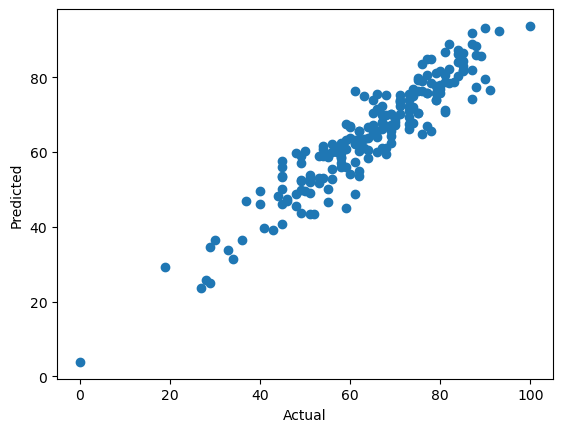

In [33]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [34]:
pd.DataFrame({'Actual Value': Y_test,'Predicted Value': Y_pred,'Difference':Y_test-Y_pred})

,Actual Value,Predicted Value,Difference
521,91,76.601562,14.398438
737,53,58.898438,-5.898438
740,80,76.781250,3.218750
660,74,76.843750,-2.843750
411,84,87.375000,-3.375000
...,...,...,...
408,52,43.382812,8.617188
332,62,61.890625,0.109375
208,74,67.882812,6.117188
613,65,67.210938,-2.210938
